## 机器学习理论基础

#### 过拟合和欠拟合

In [25]:
%matplotlib inline

In [28]:
import numpy as np
import matplotlib.pyplot as plt
n_dots = 200
x = np.linspace(0, 1, n_dots)
y = np.sqrt(x) + 0.2 * np.random.rand(n_dots) - 0.1
#y=sqrt(x)+r

In [29]:
#convert to 200*1 matrix
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [30]:
# model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [31]:
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                            include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ('linear_regression', linear_regression)
    ])
    return pipeline

In [42]:
from sklearn.model_selection import ShuffleSplit, learning_curve

def plot_learning_curve(estimator, title, 
                        x, y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=1, 
                        train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores  = learning_curve(
                                    estimator, x, y, 
                                    cv=cv,
                                   n_jobs=n_jobs,
                                   train_sizes=train_sizes)
    #print(train_sizes, train_scores, test_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std, 
                    alpha=0.1,
                    color='r')
    plt.fill_between(train_sizes, 
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, 
                    alpha=0.1,
                    color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', 
            label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
            label='Cross-validation score')
    plt.legend(loc='best')
    return plt


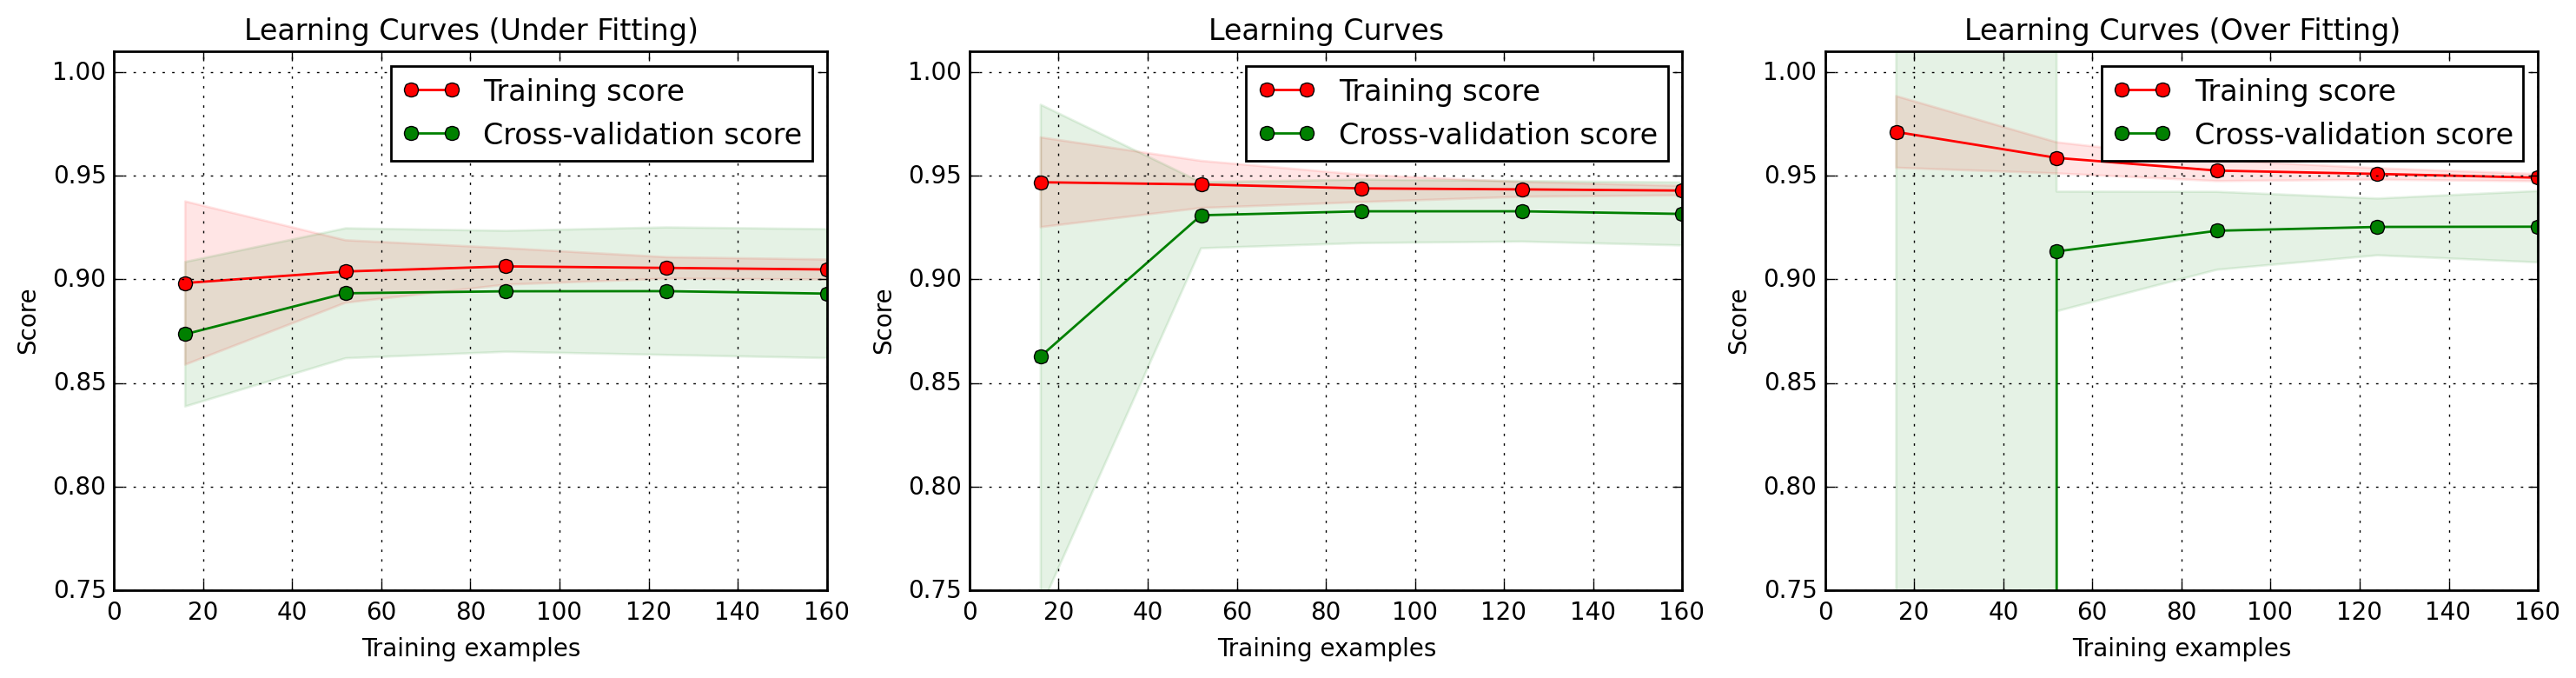

In [43]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
titles = ['Learning Curves (Under Fitting)',
         'Learning Curves',
         'Learning Curves (Over Fitting)']
degrees = [1, 3, 10]

plt.figure(figsize=(18, 4), dpi=200)

for i in range(len(degrees)):
    plt.subplot(1, 3, i+1)
    plot_learning_curve(polynomial_model(degrees[i]), 
                        titles[i],
                        x, y, 
                        ylim=(0.75, 1.01),
                        cv=cv)
plt.show()


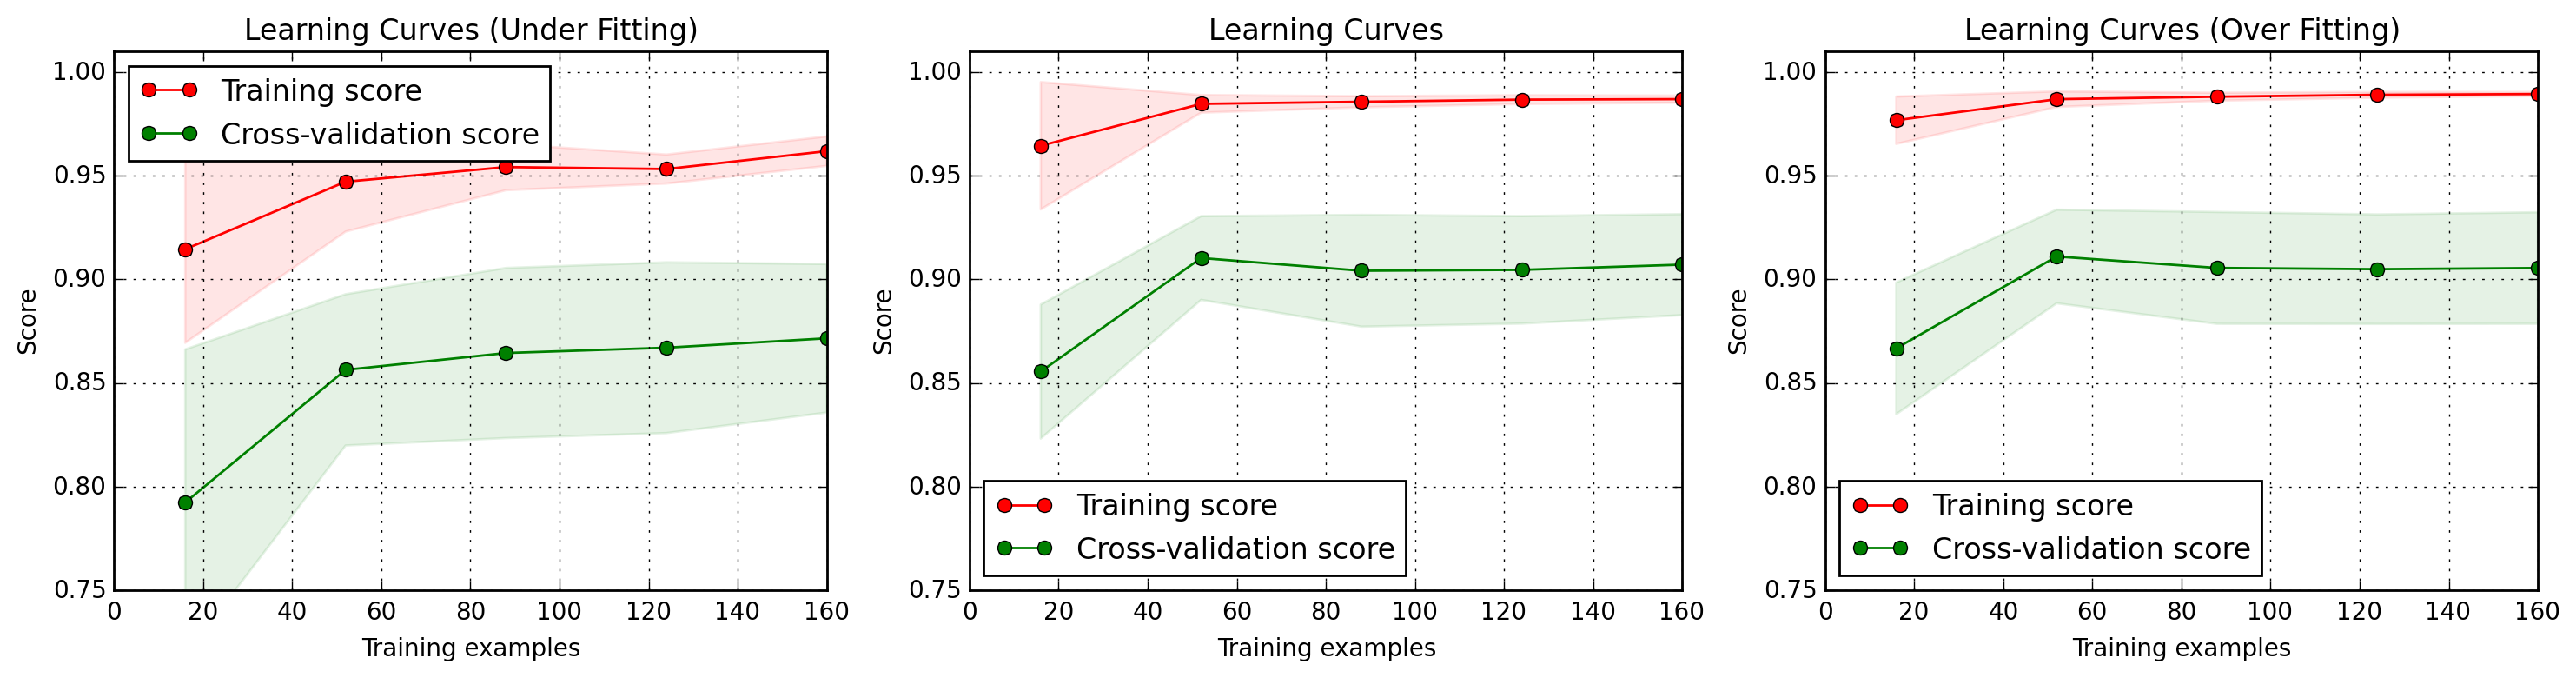

In [52]:
from sklearn.ensemble import RandomForestRegressor

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
titles = ['Learning Curves',
         'Learning Curves',
         'Learning Curves']
degrees = [1, 10, 50]

plt.figure(figsize=(18, 4), dpi=200)

for i in range(len(degrees)):
    plt.subplot(1, 3, i+1)
    model = RandomForestRegressor(n_estimators=degrees[i])
    plot_learning_curve(model, 
                        titles[i],
                        x, y, 
                        ylim=(0.75, 1.01),
                        cv=cv)
plt.show()

In [46]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)